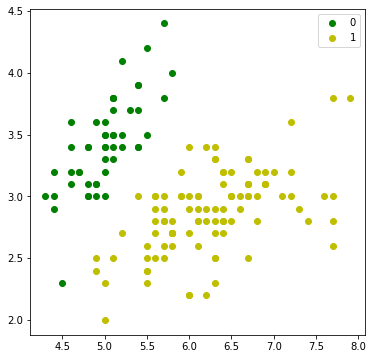

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
plt.figure(figsize=(6, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [5]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    patsy-0.5.2                |     pyhd8ed1ab_0         188 KB  conda-forge
    seaborn-0.11.2             |       hd8ed1ab_0           4 KB  conda-forge
    seaborn-base-0.11.2        |     pyhd8ed1ab_0         223 KB  conda-forge
    statsmodels-0.9.0          |py36h3010b51_1000         8.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         9.1 MB

The following NEW packages will be INSTALLED:

  patsy              conda-forge/noarch::patsy-0.5.2-pyhd8

In [16]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iter):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                gradient = np.dot(X.T, (h - y)) / y.size
                self.theta -= self.lr * gradient
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                loss = self.__loss(h, y)
                if(self.verbose ==True and i % 10000 == 0):
                    print(f'loss: {loss} \t')
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        return self.__sigmoid(np.dot(X, self.theta))
    def predict(self, X):
        return self.predict_prob(X).round() 


model = LogisticRegression(lr=0.1, num_iter=300000)
preds = model.predict(X)
(preds == y).mean()

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');

ValueError: shapes (150,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)